### Q3

### Part A:

In [1]:
from sklearn.datasets import make_classification
xdim , ydim = make_classification(n_samples=100000, n_features=2, 
                                  n_informative=2,n_redundant=0, 
                                  n_repeated=0, n_classes=2, 
                                  n_clusters_per_class=1, weights=[0.995, 0.005], 
                                  class_sep=0.5, random_state=42)
xdim.shape,ydim.shape

((100000, 2), (100000,))

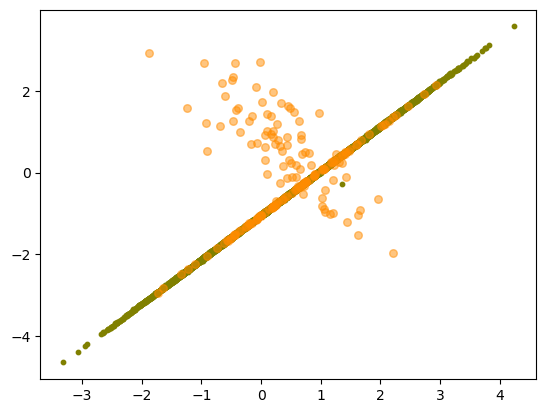

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
Xdim_for_train, Xdim_for_test, ydim_for_train, ydim_for_test = train_test_split(xdim, ydim, 
                                                                                test_size=0.2)
Que1,Que2 = Xdim_for_test[np.where(ydim_for_test == 1)[0]
                         ],Xdim_for_test[np.where(ydim_for_test == 0)[0]]
plt.scatter(Que2[:, 0], Que2[:, 1], facecolor='olive',s=10)
plt.scatter(Que1[:, 0], Que1[:, 1], facecolor='darkorange',s=30,alpha=0.5)
plt.show()

### Part B:

In [3]:
from sklearn.svm import OneClassSVM
import warnings
warnings.filterwarnings('ignore')
part_b = OneClassSVM(nu=0.05, kernel = 'rbf', gamma = 'scale')
part_b.fit(Xdim_for_train)

OneClassSVM(nu=0.05)

### Part C:

In [5]:
from sklearn.metrics import classification_report
predicted_results = part_b.predict(Xdim_for_test)
predicted_results = np.where(predicted_results == 1, 0, predicted_results)
predicted_results = np.where(predicted_results == -1, 1, predicted_results)
print(classification_report(ydim_for_test, predicted_results))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     19816
           1       0.08      0.47      0.14       184

    accuracy                           0.95     20000
   macro avg       0.54      0.71      0.56     20000
weighted avg       0.99      0.95      0.97     20000



### Part D:

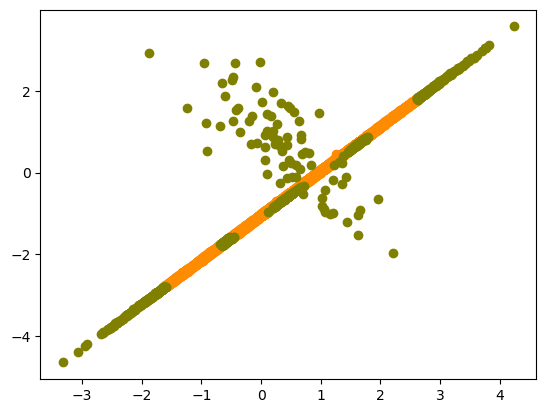

In [6]:

orginal = Xdim_for_test[np.where(predicted_results == 0)[0]]
outlier = Xdim_for_test[np.where(predicted_results == 1)[0]]
plt.scatter(orginal[:, 0], orginal[:, 1], c='darkorange')
plt.scatter(outlier[:, 0], outlier[:, 1], c='olive')
plt.show()


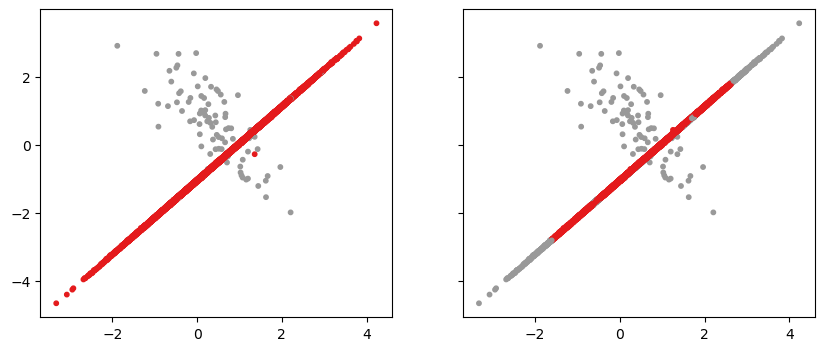

In [11]:
fig, (first, second)=plt.subplots(1, 2, sharey=True, figsize=(10, 4))
first.scatter(Xdim_for_test[:, 0], Xdim_for_test[:, 1], c=ydim_for_test,cmap='Set1',s=10)
second.scatter(Xdim_for_test[:, 0], Xdim_for_test[:, 1], c=predicted_results, cmap='Set1',s=10)
# Xdim_for_train, Xdim_for_test, ydim_for_train, ydim_for_test